# Data analysis - part 2
### Data comparison between measurements from the DIY sensor and official historical meteo data

In this notebook, we will compare the data collected by a DIY sensor based on NodeMCU and DHT22 with historical data. In Poland, meteorological data is collected by official IMGW (National Polish Meteo Institute) stations. The nearest weather station is in Puławy town (~22km in a straight line from the location of the DHT22 sensor).

In [1]:
import pandas as pd

In [2]:
# Importing data from the DIY sensor as a .csv file

data = pd.read_csv('data/nodemcu_data_final.csv', parse_dates=['date'], dayfirst=False)

In [3]:
# Importing data from the weather station in Puławy (data from the past 30 years)

meteo = pd.read_csv('data/imgw_30ymean_data.csv', parse_dates=['date'], dayfirst=False)

Let's take a look at the imported data.

In [5]:
# Data from the DIY sensor
 
data

,date,t_max,t_min,t_mean
0,2021-02-15,1.0,-4.3,-1.611111
1,2021-02-16,1.4,-9.9,-2.673611
2,2021-02-17,9.5,-1.7,1.112676
3,2021-02-18,-1.7,-12.6,-5.995804
4,2021-02-19,1.6,-12.9,-4.474074
...,...,...,...,...
315,2021-12-27,-1.7,-12.3,-6.922378
316,2021-12-28,2.0,-4.7,-0.955556
317,2021-12-29,3.6,0.1,1.690278
318,2021-12-30,6.6,2.4,4.747222


In [4]:
# Historical data from the weather station located in Puławy town (~22km in a straight line from location of the DIY sensor)

meteo

,date,t_max,t_min,t_mean
0,2021-01-01,1.193548,-3.787097,-1.480645
1,2021-01-02,1.380645,-4.329032,-1.632258
2,2021-01-03,0.541935,-4.377419,-2.048387
3,2021-01-04,0.680645,-4.419355,-1.938710
4,2021-01-05,0.667742,-4.874194,-2.190323
...,...,...,...,...
361,2021-12-27,1.941935,-3.864516,-1.129032
362,2021-12-28,1.967742,-3.116129,-0.674194
363,2021-12-29,1.812903,-3.235484,-0.948387
364,2021-12-30,1.148387,-3.725806,-1.351613


Sensor data has been recorded since 15/02/2021 and the historical data covers the whole year. We have to adjust the sizes of both dataframes.

In [4]:
meteo = meteo.loc[meteo['date'] >= '2021-02-15']
meteo

,date,t_max,t_min,t_mean
45,2021-02-15,1.874194,-3.387097,-1.058065
46,2021-02-16,2.606452,-4.196774,-1.183871
47,2021-02-17,2.841935,-4.800000,-1.409677
48,2021-02-18,3.103226,-3.003226,-0.164516
49,2021-02-19,3.458065,-2.635484,0.132258
...,...,...,...,...
361,2021-12-27,1.941935,-3.864516,-1.129032
362,2021-12-28,1.967742,-3.116129,-0.674194
363,2021-12-29,1.812903,-3.235484,-0.948387
364,2021-12-30,1.148387,-3.725806,-1.351613


In [5]:
# Index reseting

meteo = meteo.reset_index(drop=True)

If the data has already been prepared, we can compare both datasets. A list of questions we want to answer during this analysis:
- What does the chart of the mean temperature for 30 years during the year look like?
- How does the temperature chart in 2021 compare to the 30-year average?
- What are the differences between these charts?
- Which months/periods are warmer than average and which are cooler?
- What were the anomalies in relation to the average temperature for this region over the last 15 years?

### Chart of the mean temperature over the last 30 years

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

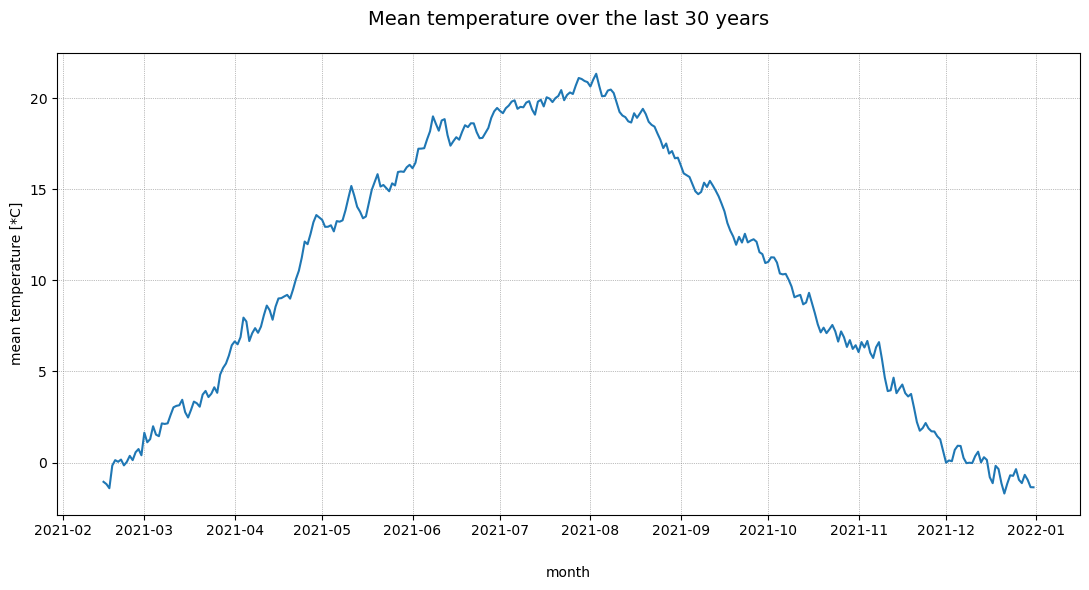

In [143]:
fig, ax = plt.subplots(figsize=(11, 6))

# Creating a plot
ax.plot(meteo['date'], meteo['t_mean'])

# Adding a grid
ax.grid(ls= ':', color='grey', lw=0.5);

# Adding the title and labels
plt.title('Mean temperature over the last 30 years', fontsize=14, pad=20)
plt.xlabel('month', labelpad=20)
plt.ylabel('mean temperature [*C]')

plt.show()

The plot of the average temperature for the last 30 years forms a fairly continuous line. In the first half of the year, the temperature gradually increases and reaches its maximum at the turn of July and August. Then the temperature drops to its minimum in December/January.

### Comparison of the temperature chart in 2021 to the 30-year average

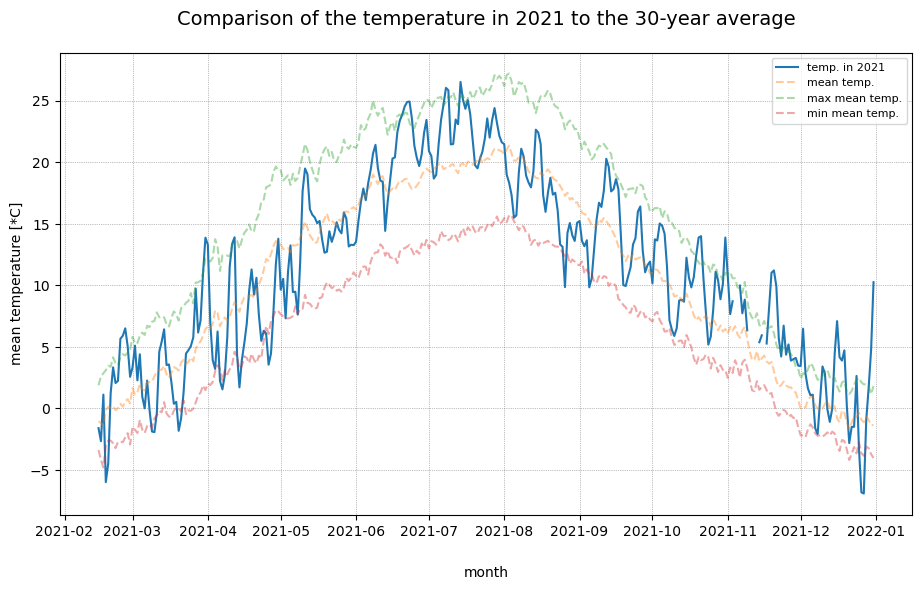

In [32]:
fig, ax = plt.subplots(figsize=(11, 6))

# Creating two plots: temperature in 2021 and mean temperature over the last 30 years
ax.plot(data['date'], data['t_mean'])
ax.plot(meteo['date'], meteo[['t_mean', 't_max', 't_min']], linestyle='dashed', alpha=0.4)

# Adding a grid
ax.grid(ls= ':', color='grey', lw=0.5);

# Adding the title. labels and the legend
plt.title('Comparison of the temperature in 2021 to the 30-year average', fontsize=14, pad=20)
plt.xlabel('month', labelpad=20)
plt.ylabel('mean temperature [*C]')

plt.legend(['temp. in 2021','mean temp.','max mean temp.','min mean temp.'], fontsize=8)

plt.show()

The chart above compares the mean temperature in 2021 to the average values of the last 30 years (including max and min temperatures). Unfortunately, due to the high density of lines, it is difficult to notice the differences. Therefore, a variant of the chart with colored areas above and below the 30-year average will be better for such a comparison.

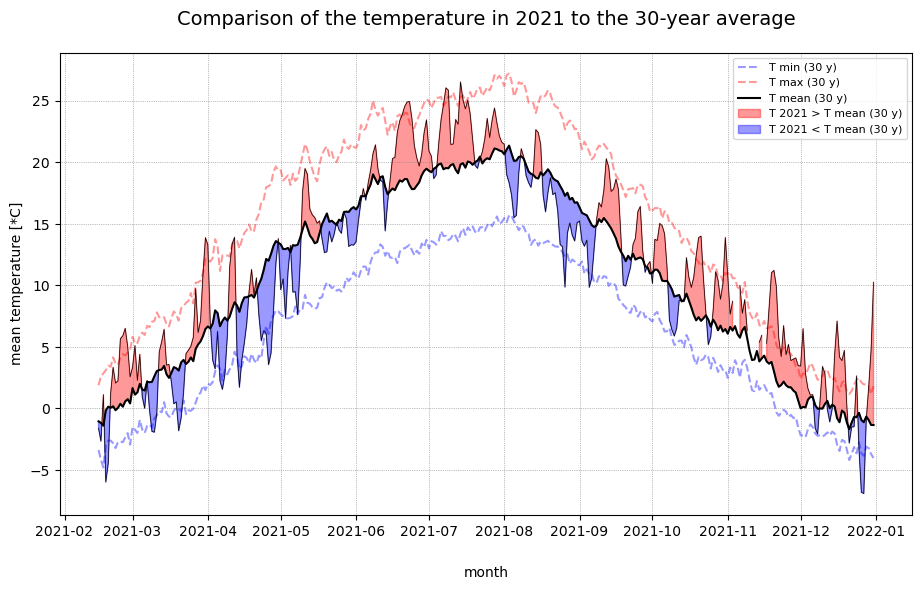

In [8]:
# Defining variables with adequate data for plotting
x = data['date']
y1 = data['t_mean']
y2 = meteo['t_mean']

y_tmin = meteo['t_min']
y_tmax = meteo['t_max']

fig, ax = plt.subplots(figsize=(11, 6), sharex=True)

# Plotting lines with max and min values of mean temperature over 30 years
ax.plot(x,y_tmin, color="blue", alpha=0.4, ls='dashed', label="T min (30 y)")
ax.plot(x,y_tmax, color="red", alpha=0.4, ls='dashed', label="T max (30 y)")

# Ploting lines with mean temperature for 2021 and 30 year average
ax.plot(x, y1, color="black", lw=0.5)
ax.plot(x, y2, color="black", lw=1.5, label='T mean (30 y)')

# Filling areas between two lines with mean temperature (red if difference is positive, blue for negative)
ax.fill_between(x, y1, y2, where=(y1 > y2), color='red', alpha=0.4,
                 interpolate=True, label="T 2021 > T mean (30 y)")
ax.fill_between(x, y1, y2, where=(y1 <= y2), color='blue', alpha=0.4,
                 interpolate=True, label="T 2021 < T mean (30 y)")

# Adding a grid
ax.grid(color = 'grey', linestyle = 'dotted', linewidth = 0.5)

# Adding the title, setting the labels and legend
plt.title('Comparison of the temperature in 2021 to the 30-year average', fontsize=14, pad=20)
plt.xlabel("month", labelpad=20)
plt.ylabel("mean temperature [*C]")

ax.legend(fontsize=8)

plt.show()

This kind of graph tells us a lot of information about the temperature in 2021 relative to the 30-year average. Some key observations:

- The warmest periods in 2021 relative to the average temperature are: June/July and October/November.
- The coldest periods in 2021 relative to the average temperature are: April, early May, August.
- As in 2020, this year there was a cold spring and a relatively warm autumn.
- The largest negative temperature anomalies occurred at the end of April, in August and in December. For example, at the end of August, the average temperature dropped to around 10 degrees, which is a typical range for fall season.
- The largest positive temperature anomalies occurred at the end of October, in November and on New Year's Eve, when the average temperature was 10 degrees.

### Temperature anomalies in 2021 relative to the 30-year average

The above conclusions were based on the observation of the chart. However, we can check what exactly was the difference in the mean temperature for each month in relation to the 30-year average.

In [2]:
# First, we need to import meteo data for the entire 30-year period from the Puławy weather station

pulawy = pd.read_csv('data/pulawy_data.csv', parse_dates=['date'], dayfirst=False)
pulawy

,date,t_max,t_min,t_mean
0,1991-01-01,3.0,-1.5,1.2
1,1991-01-02,4.5,1.0,2.6
2,1991-01-03,10.0,1.5,5.0
3,1991-01-04,6.8,3.0,4.7
4,1991-01-05,6.2,1.0,4.1
...,...,...,...,...
11287,2021-12-27,-4.4,-14.2,-9.6
11288,2021-12-28,-3.2,-8.3,-5.5
11289,2021-12-29,-1.1,-4.9,-2.8
11290,2021-12-30,3.0,-2.2,1.1


In [149]:
# Creating a Series with temperature difference for each month (except for January and February, of which there are no measurements)

t_diff = data.loc[data['date'].dt.month > 2].groupby(data['date'].dt.month)['t_mean'].agg('mean') - pulawy.loc[pulawy['date'].dt.month > 2].groupby(pulawy['date'].dt.month)['t_mean'].agg('mean')
t_diff

date
3     0.244458
4    -2.069869
5    -0.946713
6     1.988686
7     2.596716
8    -1.657086
9     0.598935
10    1.814160
11    3.008821
12    1.573647
Name: t_mean, dtype: float64

We can also present this data in the form of a bar chart.

<AxesSubplot:title={'center':'Temperature anomalies in 2021'}, xlabel='month', ylabel='temperature difference [*C]'>

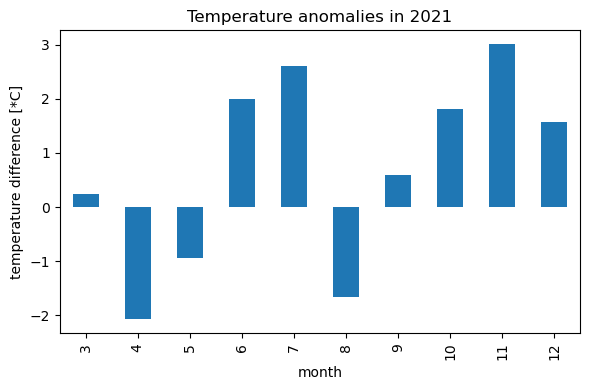

In [154]:
t_diff.plot.bar(figsize=(6,4), xlabel='month', ylabel='temperature difference [*C]', title='Temperature anomalies in 2021')

### Checking what the mean temperature in April looked like over 30 years

The largest negative temperature anomaly in 2021 occurred in April (-2* C). Based on historical data, let's check when the last time (and if at all) there was such a cold April.

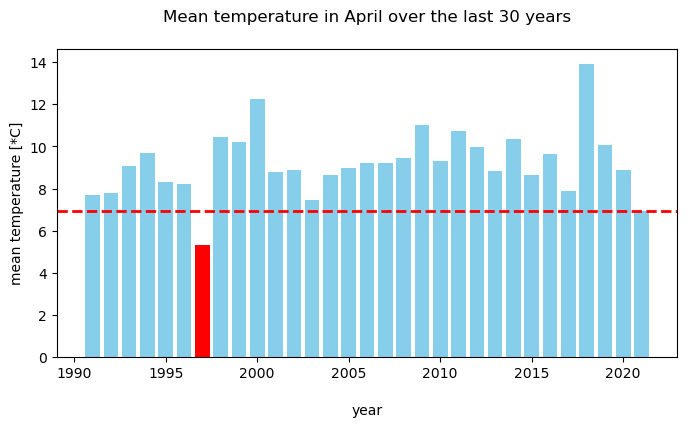

In [80]:
# Defining a variable with adequate data for plotting
april = pulawy.loc[pulawy['date'].dt.month == 4].groupby(pulawy['date'].dt.year)['t_mean'].agg('mean')

# Creating a list of colors for each year, we want all bars below the 2021 value to be red
colors = []

for value in april.values:
    if (value < april.values[-1]):
        colors.append('red')
    else:
        colors.append('skyblue')

fig, ax = plt.subplots(figsize=(8, 4))

# Creating a barplot
ax.bar(april.index, april.values, color=colors)

# Plotting a horizontal line marking the mean temperature level for 2021
ax.axhline(april.values[-1], color='red', linestyle="--", linewidth=2)

# Adding the title, axis labels
plt.title('Mean temperature in April over the last 30 years', pad=20, fontsize=12)
plt.xlabel('year', labelpad=16)
plt.ylabel('mean temperature [*C]')

plt.show()


It turned out that in 2021 we had the coldest April ***in 24 years***. During the 30 year period, April was colder only in 1997.

### Heatmap with mean temperature over the last 15 years

Now that we have historical data, we can create a heatmap for every month over the last 15 years. Thanks to this, it will be possible to compare each month over that period. 

To create a heatmap, first we need to transform the data representing the mean temperature for each month and the differences of the mean temperature in the month in relation to the 30-year average to numpy arrays. 

In [19]:
# Importing numpy library

import numpy as np

In [169]:
# Creating a data array for mean temperature in each month

y_mean = pulawy.groupby([pulawy['date'].dt.year,pulawy['date'].dt.month])['t_mean'].agg('mean').values
y_mean = y_mean[191:]
y_mean = y_mean.reshape(15,12)
y_mean

array([[ 3.04516129, -0.95714286,  6.72258065,  9.19333333, 15.82903226,
        19.09333333, 19.33870968, 19.20322581, 13.07666667,  7.78709677,
         1.36666667, -0.63548387],
       [ 0.91935484,  2.60689655,  3.86774194,  9.44666667, 13.48709677,
        18.25333333, 18.78064516, 18.65483871, 12.5       ,  9.90322581,
         5.14666667,  1.3483871 ],
       [-2.63225806, -0.74642857,  2.22903226, 11.03333333, 13.72258065,
        16.57666667, 20.12580645, 18.39032258, 14.82666667,  6.84193548,
         5.36      , -1.14516129],
       [-8.42580645, -1.99285714,  3.18709677,  9.30333333, 14.41612903,
        18.31      , 22.06451613, 20.18387097, 12.22      ,  5.52580645,
         6.48      , -4.68064516],
       [-0.37419355, -3.71071429,  3.03870968, 10.70666667, 14.56774194,
        19.23      , 18.69354839, 18.8       , 14.77      ,  7.87096774,
         2.59666667,  2.48709677],
       [-0.85483871, -6.26551724,  4.93225806,  9.95      , 15.73870968,
        17.88      , 2

In [167]:
# Creating a data array for mean temperature difference in relation to 30-year average

y_delta = pulawy.groupby([pulawy['date'].dt.year, pulawy['date'].dt.month])['t_mean'].agg('mean').subtract(pulawy.groupby(pulawy['date'].dt.month)['t_mean'].agg('mean'), level=1).values

y_delta = y_delta[191:]
y_delta = y_delta.reshape(15,12)
y_delta

array([[ 4.77242456e+00, -2.64677104e-01,  3.51720430e+00,
        -2.60215054e-02,  1.32799168e+00,  1.00365591e+00,
        -6.26014568e-01,  1.94693028e-01, -6.58924731e-01,
        -7.39334027e-01, -2.51182796e+00, -3.01352758e-01],
       [ 2.64661811e+00,  3.29936231e+00,  6.62365591e-01,
         2.27311828e-01, -1.01394381e+00,  1.63655914e-01,
        -1.18407908e+00, -3.53694069e-01, -1.23559140e+00,
         1.37679501e+00,  1.26817204e+00,  1.68251821e+00],
       [-9.04994797e-01, -5.39628180e-02, -9.76344086e-01,
         1.81397849e+00, -7.78459938e-01, -1.51301075e+00,
         1.61082206e-01, -6.18210198e-01,  1.09107527e+00,
        -1.68449532e+00,  1.48150538e+00, -8.11030177e-01],
       [-6.69854318e+00, -1.30039139e+00, -1.82795699e-02,
         8.39784946e-02, -8.49115505e-02,  2.20322581e-01,
         2.09979188e+00,  1.17533819e+00, -1.51559140e+00,
        -3.00062435e+00,  2.60150538e+00, -4.34651405e+00],
       [ 1.35306972e+00, -3.01824853e+00, -1.6666666

With the data prepared, we can create a heatmap. 

Chart guidelines:
- the color of each square corresponds to the difference in temperature from the 30-year average
- the number in bold indicates the mean temperature for that month
- the smaller number below is that month's temperature difference in relation to the 30-year average

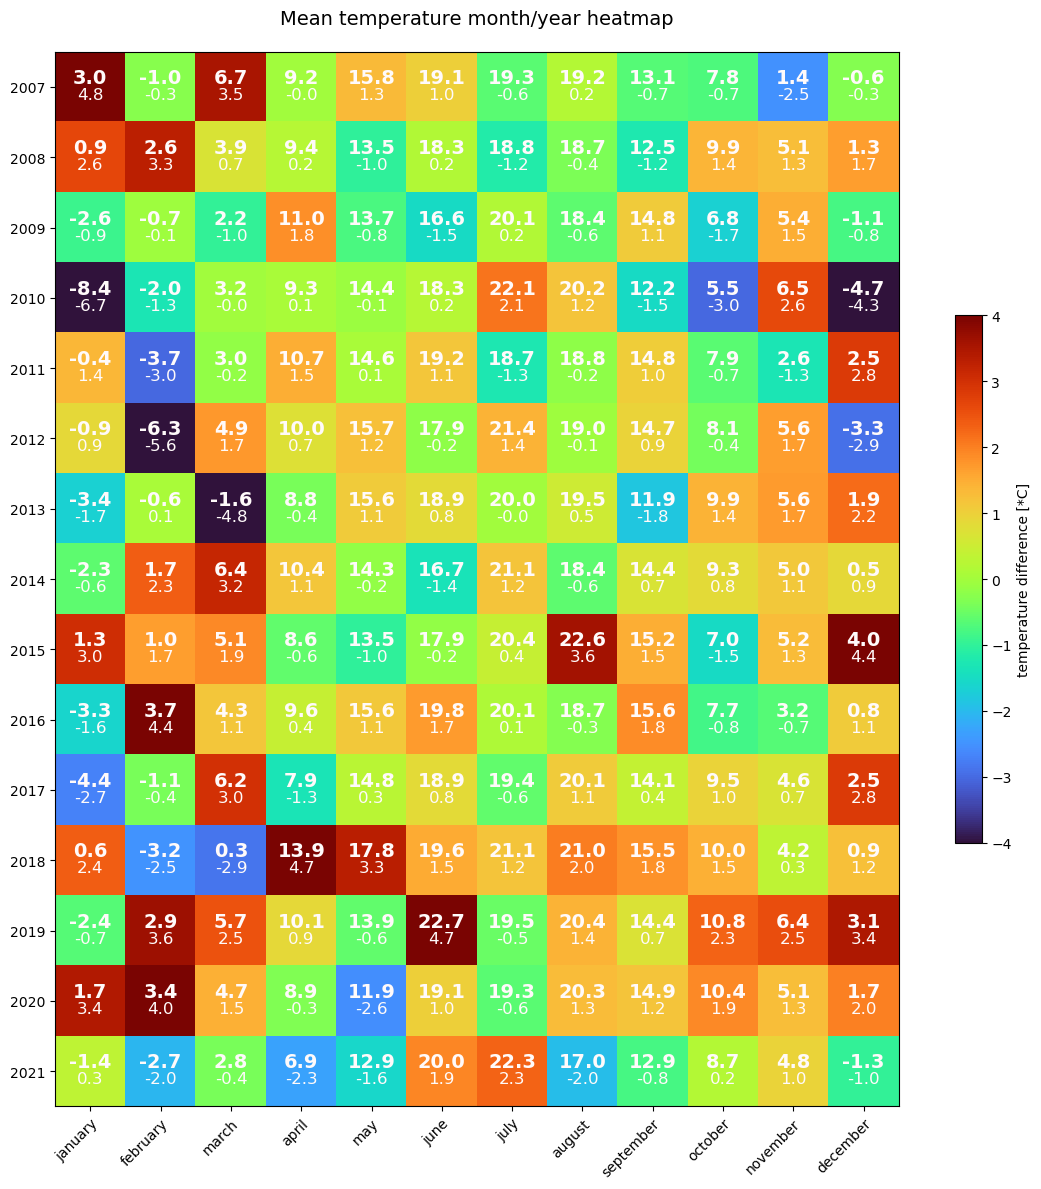

In [171]:
# Creating lists with labels for months and years
year_labels = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
month_labels = ['january','february','march','april','may','june','july','august','september','october','november','december']

# Defining variables with adequate data for plotting
temp_delta = y_delta    
temp_real = y_mean

fig, ax = plt.subplots(figsize=(12,12))

# Plotting data as a heatmap with colorbar, 
im = ax.imshow(temp_delta, cmap="turbo", vmin=-4, vmax=4)
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.5, label='temperature difference [*C]')

# Adding the title and ticks for x/y axis
plt.title("Mean temperature month/year heatmap", fontsize=14, pad=20)
plt.xticks(np.arange(len(month_labels)), month_labels)
plt.yticks(np.arange(len(year_labels)), year_labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Adding labels with mean temperature and mean temperature difference compared to 30-year average
for i in range(len(year_labels)):
    for j in range(len(month_labels)):
        text = ax.text(j, i, round(temp_real[i, j],1),
                       ha="center", va="bottom", color="snow", fontweight='semibold', size='14')

for i in range(len(year_labels)):
    for j in range(len(month_labels)):
        text = ax.text(j, i, round(temp_delta[i, j],1),
                       ha="center", va="top", color="snow", size='12') 

plt.show()

This chart gives us a lot of interesting information. Below are a few selected ones:
- Each year, larger anomalies (positive and negative) of more than 2 degrees can be observed (only 2009 was quite close to the 30-year average in terms of mean temperature each month).
- Looking at the last 15 years, 2021 was an exceptionally cold spring especially in April and May.
- However, this year was a very warm summer period (especially June and July).
- The largest negative anomalies were in April and August. There have not been such cold April and August in the last 15 years.


### Checking how many negative and positive temperature anomalies were for each month in last 15 years

There is a lot of data in the chart above and it's hard to find some dependencies, anomalies and other observations at first glance. Therefore, we will try to draw up exact figures for how many months over the 15-year period there were months with an average temperature above or below the 30-year average temperature.

In [4]:
# Calculating the mean temperature for last 30 years 

avg = meteo.groupby(meteo['date'].dt.month)['t_mean'].agg('mean')
avg

date
1.0     -1.727263
2.0     -0.711406
3.0      3.205376
4.0      9.219355
5.0     14.501041
6.0     18.089677
7.0     19.964724
8.0     19.008533
9.0     13.735591
10.0     8.526431
11.0     3.878495
12.0    -0.334131
Name: t_mean, dtype: float64

In [5]:
# Selecting data from last 15 years and grouping by year and month

last15years = pulawy.loc[pulawy['date'].dt.year >= 2007]
last15years = last15years.groupby([last15years['date'].dt.year, last15years['date'].dt.month])['t_mean'].agg('mean').droplevel(level=0)


In [7]:
# Creating a new dataframe with mean temperature for consecutive months from the last 15 years

df = pd.DataFrame()
df['month']= last15years.index
df['t_mean'] = last15years.values
df

,month,t_mean
0,1,3.045161
1,2,-0.957143
2,3,6.722581
3,4,9.193333
4,5,15.829032
...,...,...
175,8,17.045161
176,9,12.933333
177,10,8.725806
178,11,4.833333


The next step will be to compare the average temperature for each month with the 30-year average. Depending on the result, the new column 'avg_relation' will be assigned a new value: above or below.

In [10]:
for idx, row in df.iterrows():
    if (row['t_mean'] > avg[row['month']]):
        df.at[idx,'avg_relation'] = 'above'
    else:
        df.at[idx,'avg_relation'] = 'below'

In [11]:
df

,month,t_mean,avg_relation
0,1,3.045161,above
1,2,-0.957143,below
2,3,6.722581,above
3,4,9.193333,below
4,5,15.829032,above
...,...,...,...
175,8,17.045161,below
176,9,12.933333,below
177,10,8.725806,above
178,11,4.833333,above


In [12]:
# Creating the final dataframe with above/below records counted

avg_relation = pd.concat([
df.loc[df['avg_relation'] == 'above'].groupby('month')['avg_relation'].count(),
df.loc[df['avg_relation'] == 'below'].groupby('month')['avg_relation'].count()],
axis=1
)

In [18]:
# Changing column names

avg_relation.columns = ['above','below']

The final table that indicates how many individual months were above or below the 30-year average.

In [19]:
avg_relation

,above,below
month,,
1,8,7
2,7,8
3,9,6
4,9,6
5,7,8
6,11,4
7,8,7
8,8,7
9,10,5


Let's create a bar chart that presents the data in a more readable form.

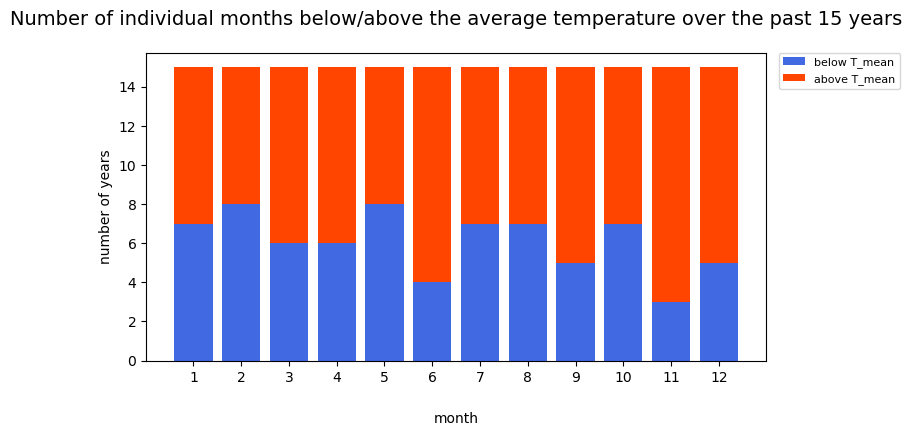

In [25]:
fig, ax = plt.subplots(figsize=(8, 4))

# Defining variables with data to plot
x = avg_relation.index
y1 = avg_relation['below']
y2 = avg_relation['above']

# Creating a stacked bar plot
ax.bar(x, y1, color='royalblue')
ax.bar(x, y2, bottom=y1, color='orangered')

# Adding the title, labels and the legend
plt.title('Number of individual months below/above the average temperature over the past 15 years', fontsize=14, pad=20)
plt.xlabel("month", labelpad=20)
plt.ylabel("number of years")
plt.xticks(x)

ax.legend(['below T_mean','above T_mean'], fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.show()

Some observations:
- In this period, there were no predominantly negative anomalies in any month.
- The most positive anomalies occurred in November and June (12 and 11 years with mean temperature above the average) and slightly less in September and December.